<a href="https://colab.research.google.com/github/Chirag314/Bagging-winedata/blob/main/Bagging_winedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [1]:
#import required libraries
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [2]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter05/winedata.csv'
df_winedata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_winedata.head(5))

   Quality  Alcohol  Malic Acid   Ash  Alcalinity  Magnesium  Total phenols  \
0        1    13.20        1.78  2.14        11.2        100           2.65   
1        1    13.16        2.36  2.67        18.6        101           2.80   
2        1    14.37        1.95  2.50        16.8        113           3.85   
3        1    13.24        2.59  2.87        21.0        118           2.80   
4        1    14.20        1.76  2.45        15.2        112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
2        3.49                  0.24             2.18             7.80  0.86   
3        2.69                  0.39             1.82             4.32  1.04   
4        3.39                  0.34             1.97             6.75  1.05   

   OD280  Proline  
0   3.40     1050  
1   3.17  

In [3]:
df_winedata.shape

(177, 14)

In [4]:
df_winedata.dtypes
#df_backorder.describe()

Quality                   int64
Alcohol                 float64
Malic Acid              float64
Ash                     float64
Alcalinity              float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [5]:
# check missing values
df_winedata.isnull().sum()
columns_with_missing_values=df_winedata.columns[df_winedata.isnull().any()]
df_winedata[columns_with_missing_values].isnull().sum()

Series([], dtype: float64)

#####WWe notice that there are no missing values in wine data

In [8]:
#We separate our features and the response set. We also split our data into training and testing subsets.
X=df_winedata.iloc[:,1:14]
Y=df_winedata.iloc[:,0]

X_train,X_test, Y_train, Y_test=train_test_split(X,Y , random_state=1)

In [10]:
#We create an instance of the DecisionTreeClassifier class and pass it to the BaggingClassifier():
#Note that in the preceding code block, we have declared bootstrap=True. This is the default value and indicates that samples are drawn with replacement
dt_model=DecisionTreeClassifier(criterion='entropy')
bag_dt_model=BaggingClassifier(dt_model,max_features=1.0,n_estimators=5, random_state=1,bootstrap=True)

In [11]:
# Fit the model
bag_dt_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=5, random_state=1)

In [12]:
# Check the score after passing test data
bag_dt_model.score(X_test,Y_test)

0.9111111111111111

In [13]:
#We use the predict function to predict the response variable as follows:
predictedvalues=bag_dt_model.predict(X_test,)

In [15]:
#We will now use a code to plot the confusion matrix.
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes,rotation=45)
  plt.yticks(tick_marks, classes)

  thresh=cm.max()
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i ,cm[i,j],horizontalalighment='center',
             color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('Actuals')
    plt.xlabel('Predicted')

In [17]:
# This  variable holds class labels of our target
target_names=['1','2','3']
import itertools
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, predictedvalues)

# Plotting the confusion matriz
plt.figure(figsize=(3,3))
plot_confusion_matrix(cm=cm,classes=target_names,normalize=False)
plt.show()


TypeError: ignored

<Figure size 216x216 with 0 Axes>

In [ ]:
#We start by creating the bootstrap samples
def create_bootstrap_oob(df):
  global df_oob
  global df_bootstrap_sample
  #Creating bootstrap sample
  df_bootstrap_sample=resample(df,replace=True,n_samples=100)
  #creating oob sample
  bootstrap_sample_index=tuple(df_bootstrap_sample.index)
  bootstrap_df=df.index.isin(bootstrap_sample_index)
  df_oob=df[~bootstrap_df]

We build models using the bootstrap samples and average the cost function across all the models. We use the SGDRegressor() on each bootstrap sample. In the following code block, we reuse our previously written custom function, create_bootstrap_oob(), to create the bootstrap and OOB error samples:

In [ ]:
iteration=50
mse_each_iteration=list()
lm=SGDRegressor()
total_mse=0
average_mse=list()

for i in range(iteration):
  create_bootstrap_oob(df_autodata)

  #bootstrap sample features set
  x_bs=df_bootstrap_sample.iloc[:,1:8]
  #Bootstrap sample response variable
  y_bs=df_bootstrap_sample.iloc[:,0]

  #oob sample features set
  x_oob=df_oob.iloc[:,1:8]
  #OB sample response variable
  y_oob=df_oob.iloc[:,0]

  # fit your model with bootstrap sample
  lm=SGDRegressor()
  lm.fit(x_bs,y_bs)

  #test your model on out of bag sample
  predictedvalues=lm.predict(x_oob)

  #capture mse for the predicted values
  mse=mean_squared_error(y_oob,predictedvalues)

  #create a list of mse values
  mse_each_iteration.append(mse)

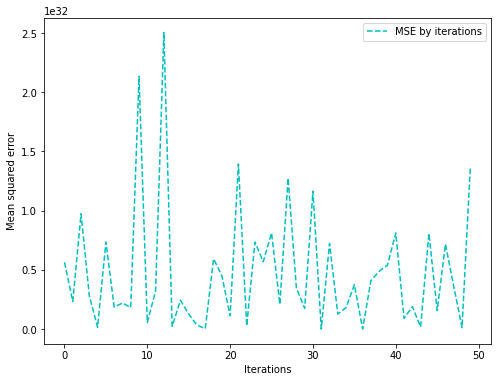

In [ ]:
#Plot mse for each model built
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(8,6))

plt.plot(mse_each_iteration,'c--',label='MSE by iterations')

plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.legend(loc=1)
plt.show()